<a href="https://colab.research.google.com/github/davidsonsantana89/RNA-e-Deep-Learning---CESAR-School-2023.02/blob/main/Atividade%20Aula%203.2/dass_3_2_LogisticRegressionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAVIDSON ALVES SANTOS DE SANTANA

dass@cesar.school

# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil

Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 7.13 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

processed  raw


In [31]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [32]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

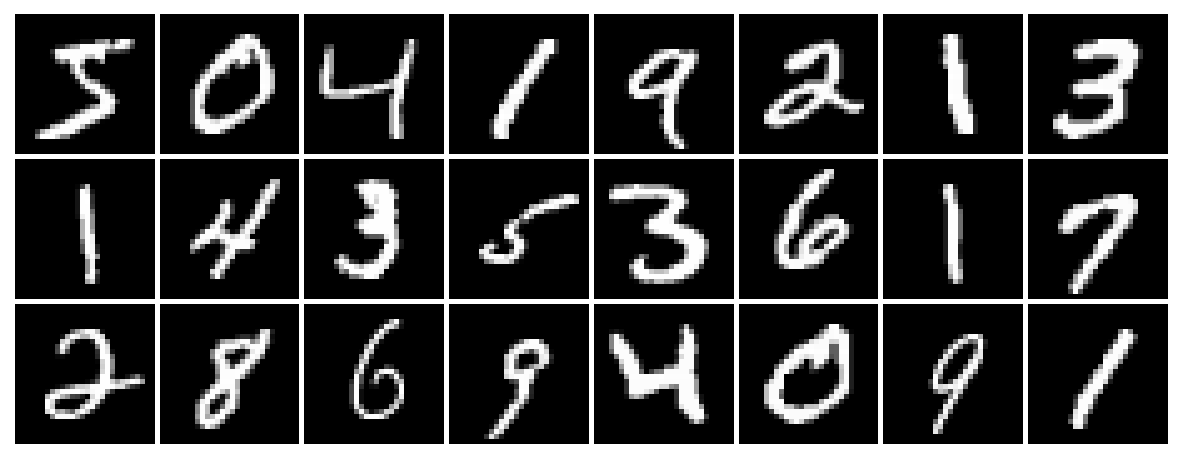

In [33]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


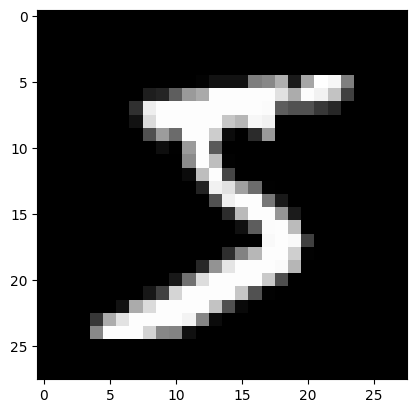

In [35]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [36]:
image

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

## Modelo

In [37]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

28 * 28 = 784

28 * 28 * 10 + 10 = 7850 params

### Testando um predict com poucas amostras

In [38]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0114, -0.1110,  0.2036,  0.1450, -0.4046,  0.1420,  0.1361,  0.0291,
         -0.3935, -0.3755],
        [ 0.0035, -0.4112,  0.0946,  0.1642, -0.1162,  0.2796,  0.2400,  0.0831,
         -0.3130, -0.5378],
        [ 0.1163, -0.1739,  0.1984,  0.2112, -0.0096,  0.1169, -0.0020, -0.4015,
         -0.2104,  0.0482],
        [ 0.0625,  0.0537, -0.0451,  0.1547,  0.1202, -0.0563, -0.2949,  0.0156,
         -0.0589, -0.4371],
        [-0.1367, -0.2166, -0.1872, -0.0792, -0.2238,  0.2899, -0.2562, -0.0355,
         -0.1028, -0.4182]], grad_fn=<AddmmBackward0>)

In [43]:
x_train[:5].view(-1,28*28)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [44]:
xin

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [45]:
import torch.nn.functional as F
F.softmax(score, dim=1)

tensor([[0.1049, 0.0928, 0.1271, 0.1199, 0.0692, 0.1195, 0.1188, 0.1067, 0.0699,
         0.0712],
        [0.1021, 0.0674, 0.1118, 0.1199, 0.0906, 0.1345, 0.1293, 0.1105, 0.0744,
         0.0594],
        [0.1117, 0.0835, 0.1212, 0.1228, 0.0985, 0.1117, 0.0992, 0.0665, 0.0805,
         0.1043],
        [0.1101, 0.1092, 0.0989, 0.1208, 0.1167, 0.0978, 0.0770, 0.1051, 0.0976,
         0.0668],
        [0.0984, 0.0908, 0.0935, 0.1042, 0.0902, 0.1507, 0.0873, 0.1089, 0.1018,
         0.0742]], grad_fn=<SoftmaxBackward0>)

In [47]:
torch.max(F.softmax(score, dim=1), dim=1)

torch.return_types.max(
values=tensor([0.1271, 0.1345, 0.1228, 0.1208, 0.1507], grad_fn=<MaxBackward0>),
indices=tensor([2, 5, 3, 3, 5]))

## Treinamento

### Inicialização dos parâmetros

In [48]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [49]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-9d_o83zz
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-9d_o83zz
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [50]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3169, grad_fn=<NllLossBackward0>)

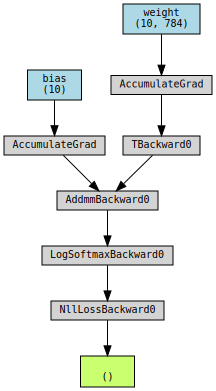

In [51]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [52]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [53]:
print('Final loss:', loss.item())

Final loss: 0.26607999205589294


### Visualizando gráfico de perda durante o treinamento

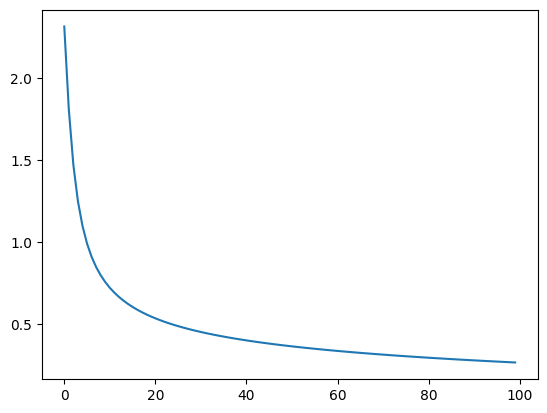

In [55]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [56]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [57]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,3,1,0
2,0,1,90,1,0,1,0,1,2,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,82,0,0,1,1
6,1,0,1,1,2,2,91,0,1,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


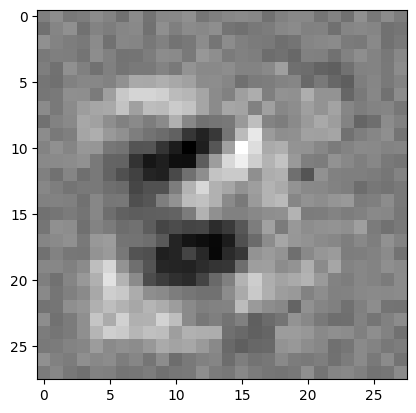

In [58]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

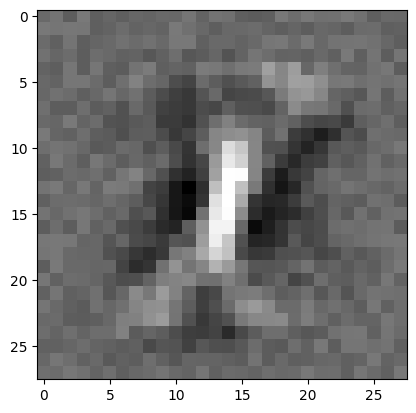

In [59]:
# Visualizando pesos da classe 1
plt.imshow(weights[1, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

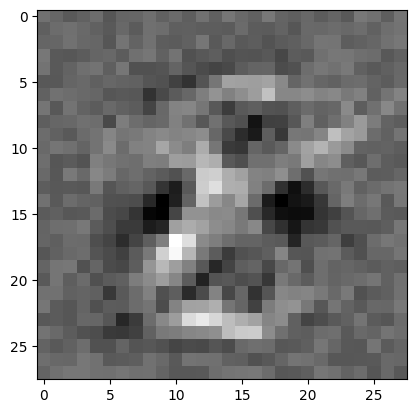

In [60]:
# Visualizando pesos da classe 8
plt.imshow(weights[8, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

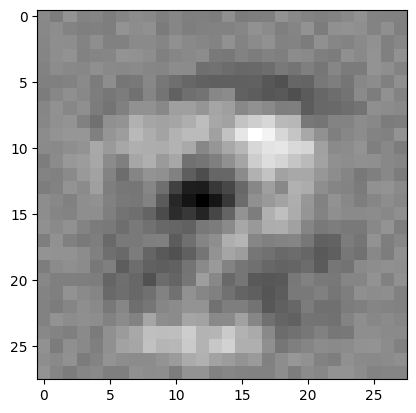

In [61]:
# Visualizando pesos da classe 7
plt.imshow(weights[7, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

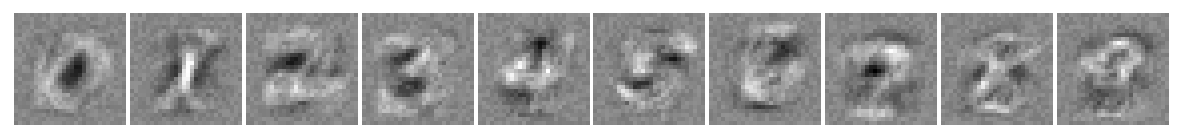

In [62]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [69]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # imprimir o numero da época, o loss e accuracy
    print(f'epoch {i+1}/{epochs}, Loss: {loss.item():.6f}, accuracy: {accuracy}')

    # verbose
    # if (i+1) % 20 == 0:
    #     print(f'Epoch[{i+1}/{epochs}], loss: {loss.item():.6f}, accuracy: {accuracy}')

epoch 1/100, Loss: 0.064205, accuracy: 0.999
epoch 2/100, Loss: 0.064118, accuracy: 0.999
epoch 3/100, Loss: 0.064031, accuracy: 0.999
epoch 4/100, Loss: 0.063943, accuracy: 0.999
epoch 5/100, Loss: 0.063856, accuracy: 0.999
epoch 6/100, Loss: 0.063770, accuracy: 0.999
epoch 7/100, Loss: 0.063683, accuracy: 0.999
epoch 8/100, Loss: 0.063597, accuracy: 0.999
epoch 9/100, Loss: 0.063511, accuracy: 0.999
epoch 10/100, Loss: 0.063425, accuracy: 0.999
epoch 11/100, Loss: 0.063340, accuracy: 0.999
epoch 12/100, Loss: 0.063254, accuracy: 0.999
epoch 13/100, Loss: 0.063169, accuracy: 0.999
epoch 14/100, Loss: 0.063084, accuracy: 0.999
epoch 15/100, Loss: 0.063000, accuracy: 1.0
epoch 16/100, Loss: 0.062915, accuracy: 1.0
epoch 17/100, Loss: 0.062831, accuracy: 1.0
epoch 18/100, Loss: 0.062747, accuracy: 1.0
epoch 19/100, Loss: 0.062663, accuracy: 1.0
epoch 20/100, Loss: 0.062580, accuracy: 1.0
epoch 21/100, Loss: 0.062496, accuracy: 1.0
epoch 22/100, Loss: 0.062413, accuracy: 1.0
epoch 23/100,

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

epoch 1/100, Loss: 0.041276, accuracy: 1.0


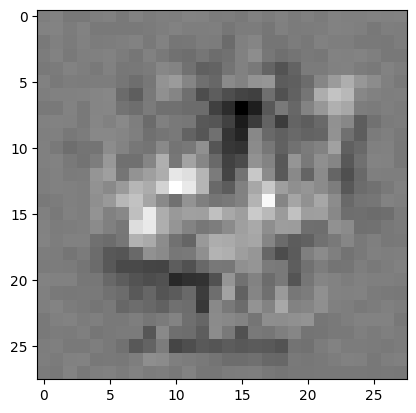

epoch 2/100, Loss: 0.041238, accuracy: 1.0


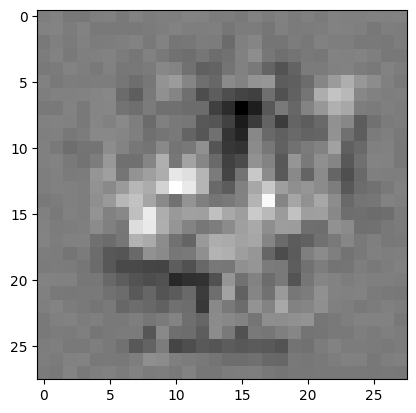

epoch 3/100, Loss: 0.041201, accuracy: 1.0


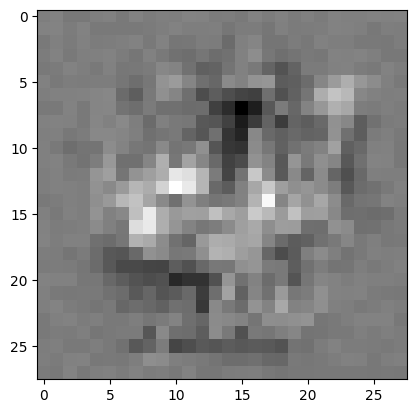

epoch 4/100, Loss: 0.041164, accuracy: 1.0


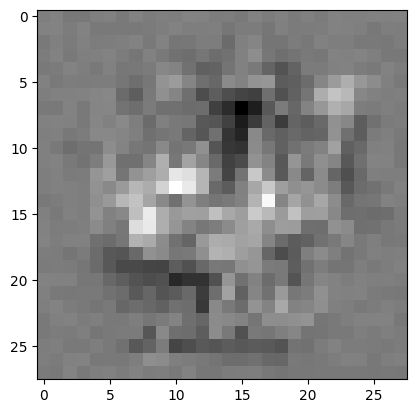

epoch 5/100, Loss: 0.041127, accuracy: 1.0


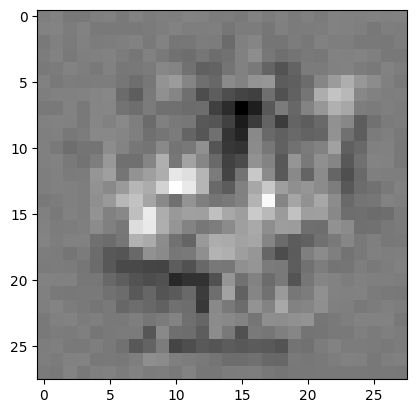

epoch 6/100, Loss: 0.041090, accuracy: 1.0


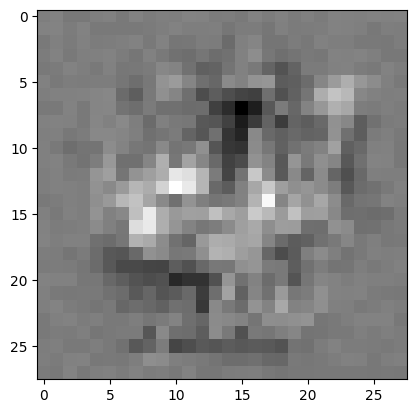

epoch 7/100, Loss: 0.041053, accuracy: 1.0


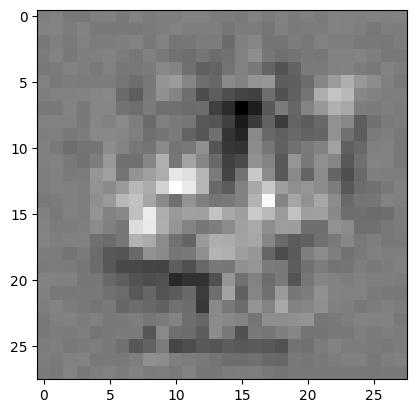

epoch 8/100, Loss: 0.041016, accuracy: 1.0


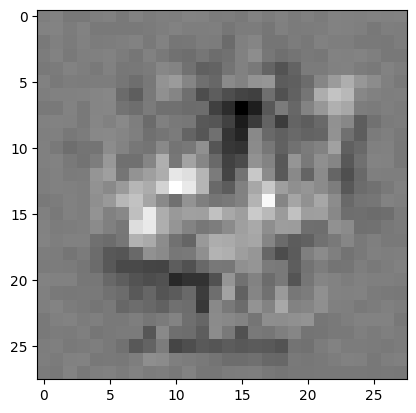

epoch 9/100, Loss: 0.040979, accuracy: 1.0


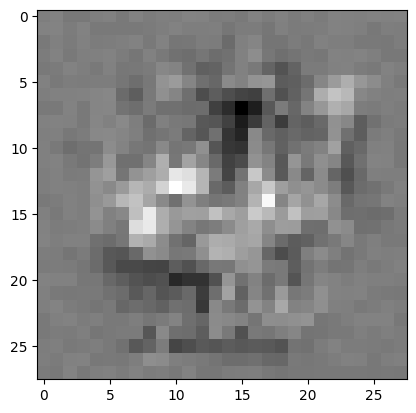

epoch 10/100, Loss: 0.040943, accuracy: 1.0


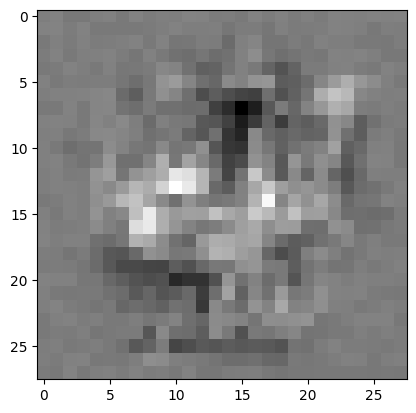

epoch 11/100, Loss: 0.040906, accuracy: 1.0


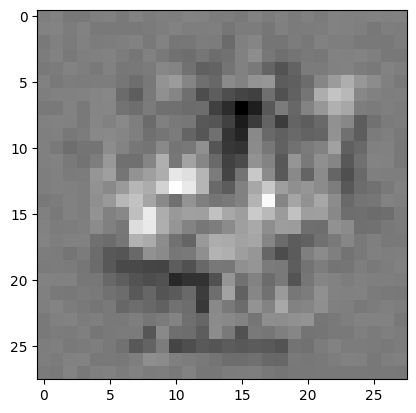

epoch 12/100, Loss: 0.040869, accuracy: 1.0


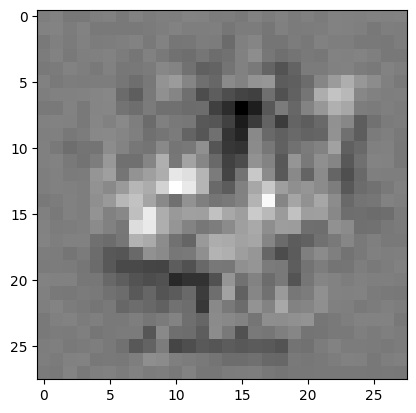

epoch 13/100, Loss: 0.040833, accuracy: 1.0


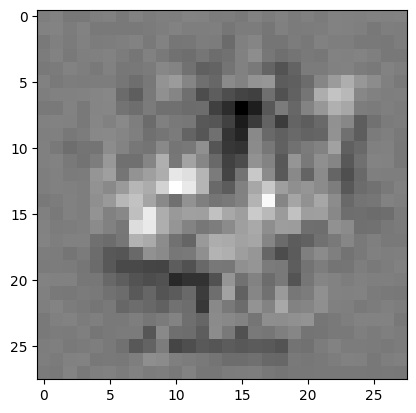

epoch 14/100, Loss: 0.040796, accuracy: 1.0


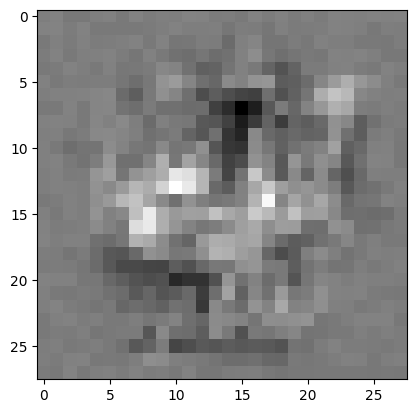

epoch 15/100, Loss: 0.040760, accuracy: 1.0


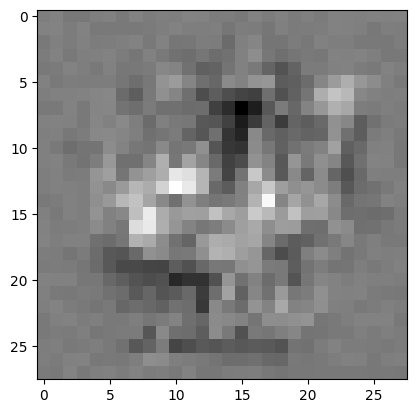

epoch 16/100, Loss: 0.040723, accuracy: 1.0


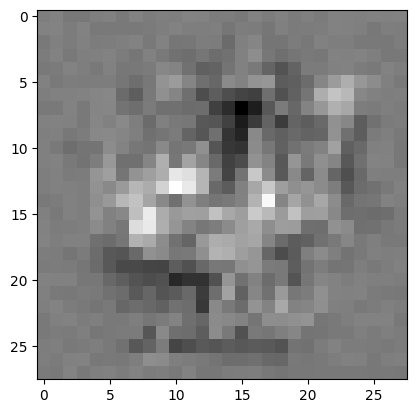

epoch 17/100, Loss: 0.040687, accuracy: 1.0


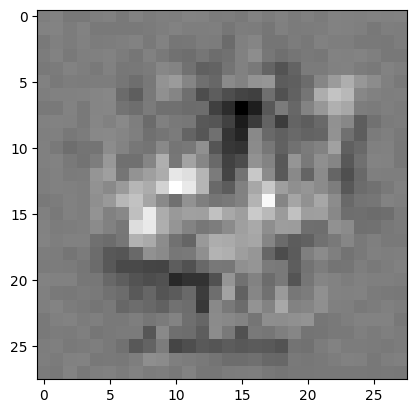

epoch 18/100, Loss: 0.040651, accuracy: 1.0


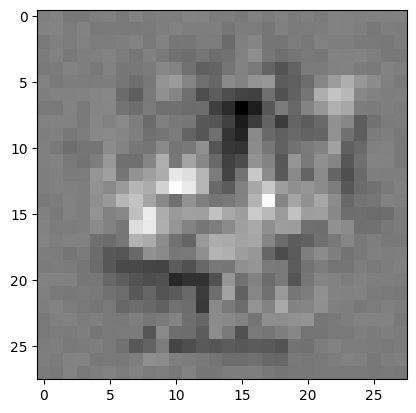

epoch 19/100, Loss: 0.040615, accuracy: 1.0


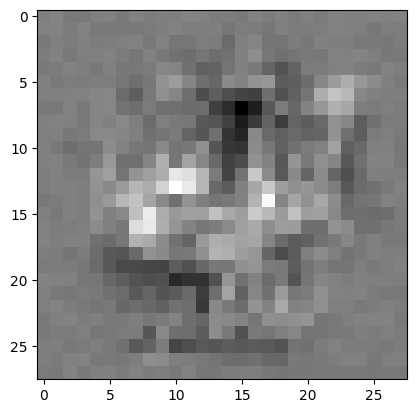

epoch 20/100, Loss: 0.040579, accuracy: 1.0


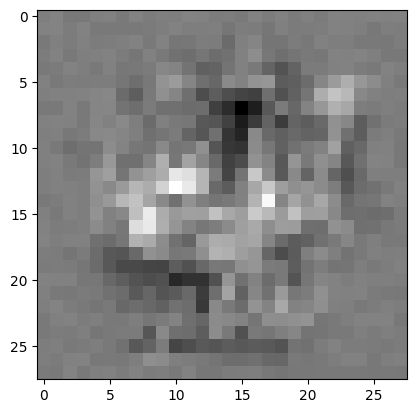

epoch 21/100, Loss: 0.040543, accuracy: 1.0


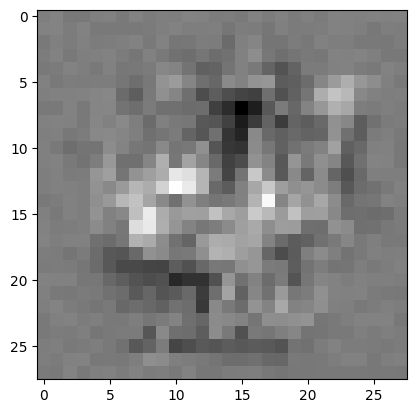

epoch 22/100, Loss: 0.040507, accuracy: 1.0


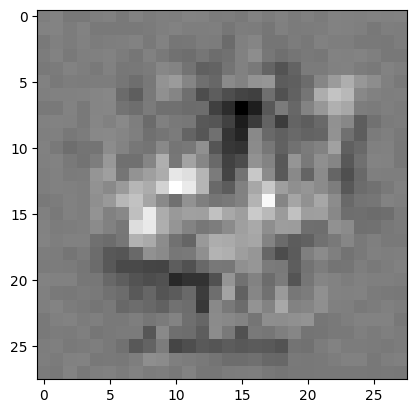

epoch 23/100, Loss: 0.040471, accuracy: 1.0


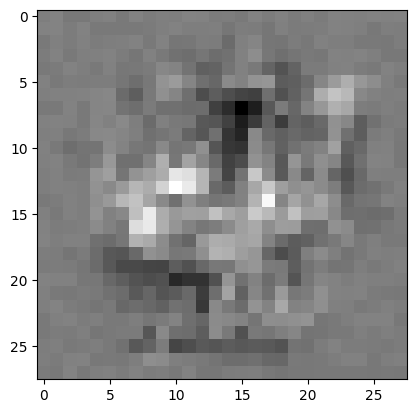

epoch 24/100, Loss: 0.040435, accuracy: 1.0


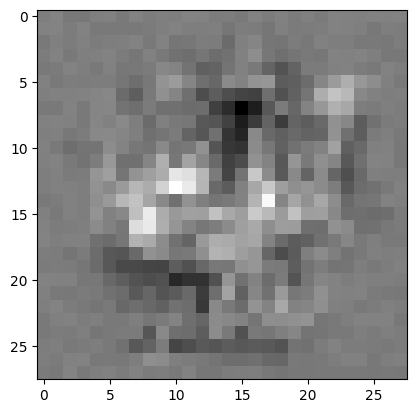

epoch 25/100, Loss: 0.040399, accuracy: 1.0


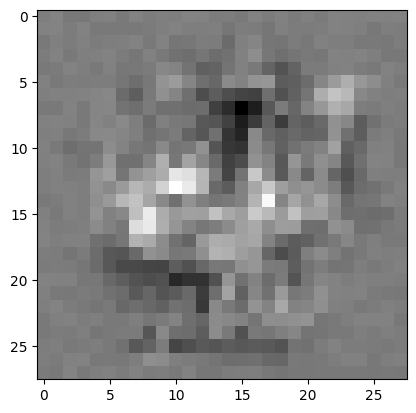

epoch 26/100, Loss: 0.040363, accuracy: 1.0


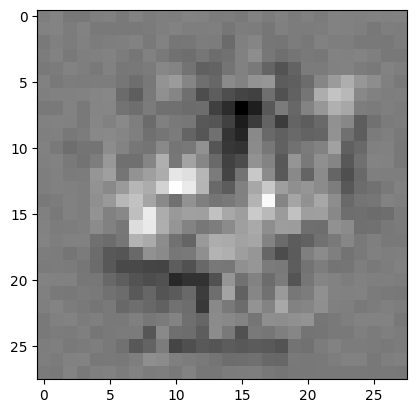

epoch 27/100, Loss: 0.040328, accuracy: 1.0


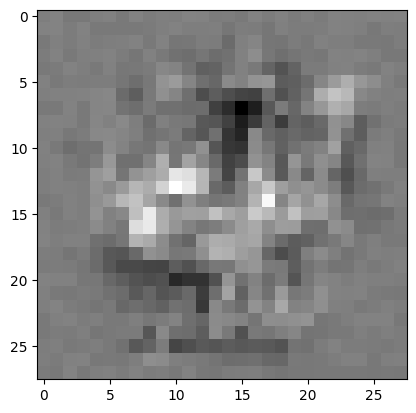

epoch 28/100, Loss: 0.040292, accuracy: 1.0


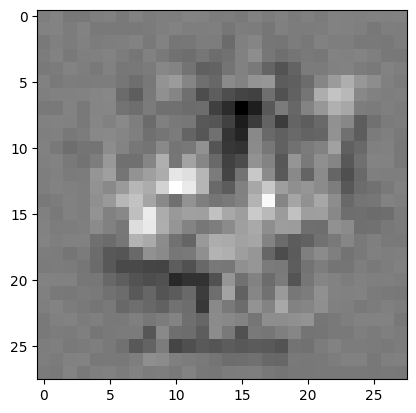

epoch 29/100, Loss: 0.040256, accuracy: 1.0


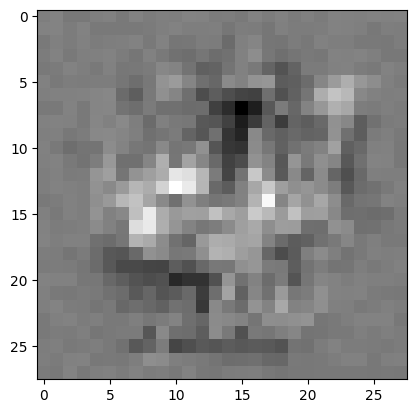

epoch 30/100, Loss: 0.040221, accuracy: 1.0


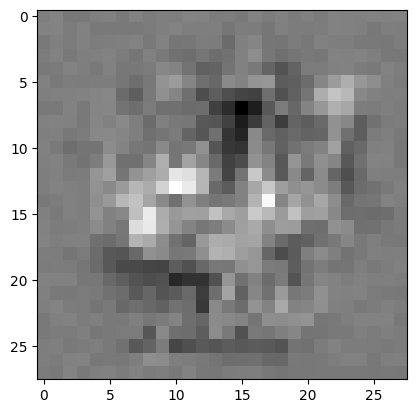

epoch 31/100, Loss: 0.040186, accuracy: 1.0


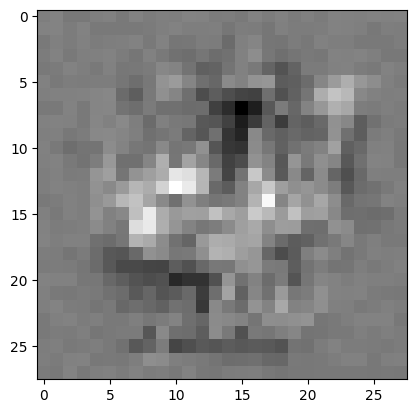

epoch 32/100, Loss: 0.040150, accuracy: 1.0


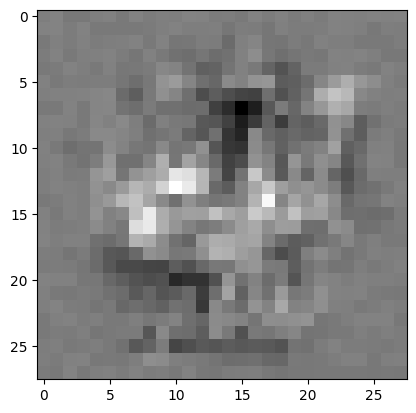

epoch 33/100, Loss: 0.040115, accuracy: 1.0


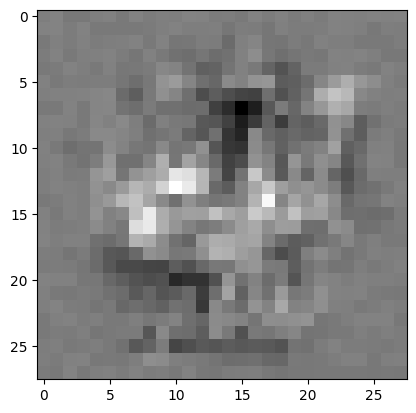

epoch 34/100, Loss: 0.040080, accuracy: 1.0


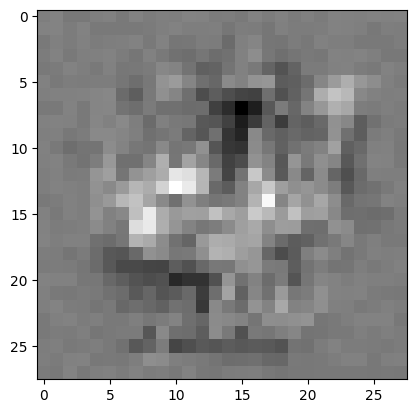

epoch 35/100, Loss: 0.040044, accuracy: 1.0


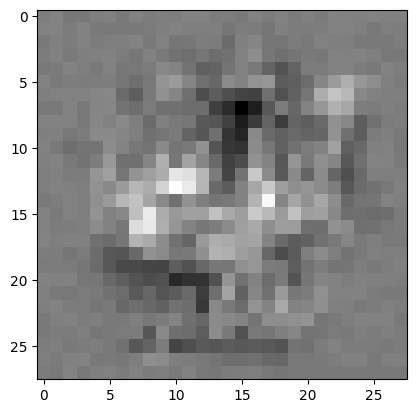

epoch 36/100, Loss: 0.040009, accuracy: 1.0


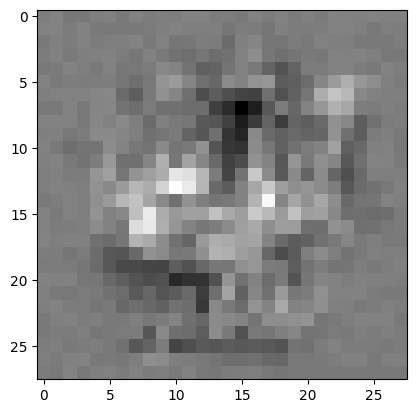

epoch 37/100, Loss: 0.039974, accuracy: 1.0


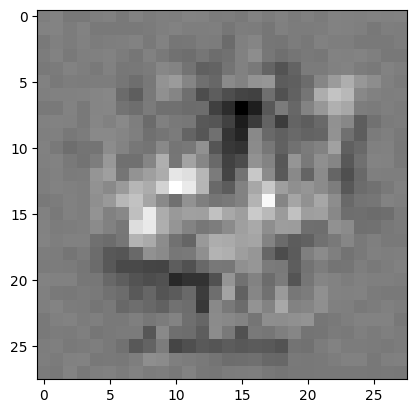

epoch 38/100, Loss: 0.039939, accuracy: 1.0


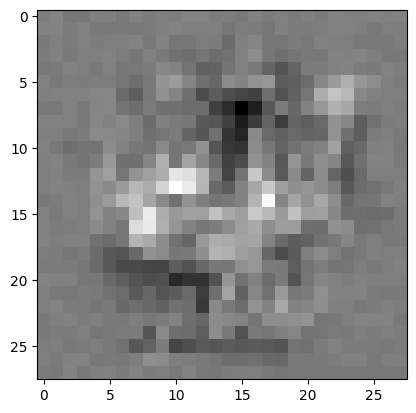

epoch 39/100, Loss: 0.039904, accuracy: 1.0


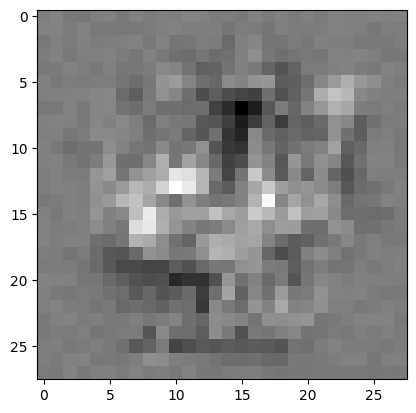

epoch 40/100, Loss: 0.039869, accuracy: 1.0


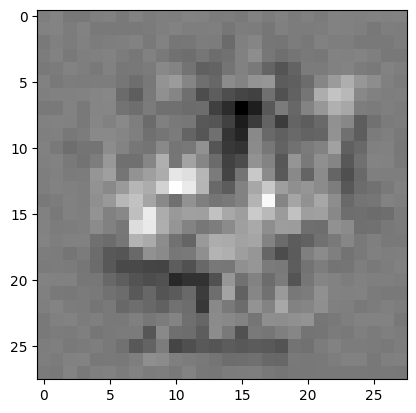

epoch 41/100, Loss: 0.039835, accuracy: 1.0


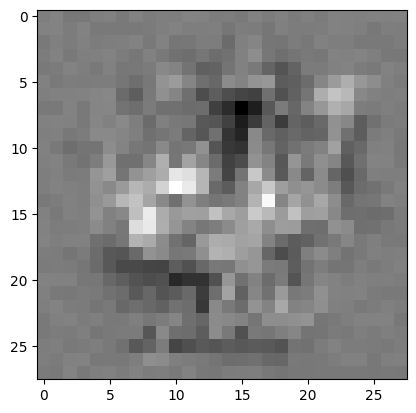

epoch 42/100, Loss: 0.039800, accuracy: 1.0


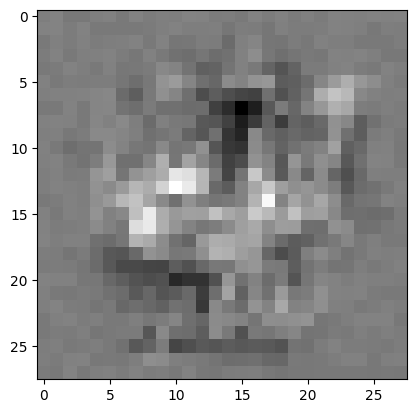

epoch 43/100, Loss: 0.039765, accuracy: 1.0


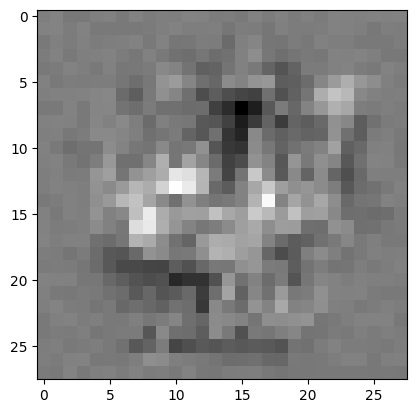

epoch 44/100, Loss: 0.039730, accuracy: 1.0


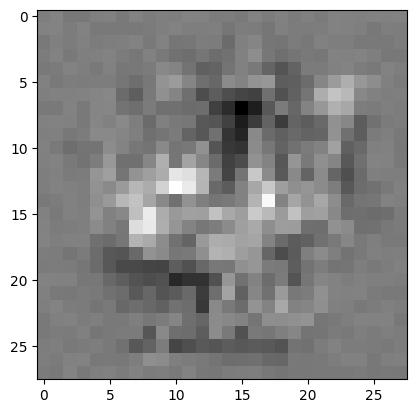

epoch 45/100, Loss: 0.039696, accuracy: 1.0


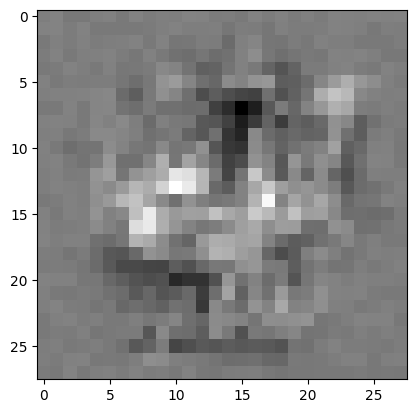

epoch 46/100, Loss: 0.039661, accuracy: 1.0


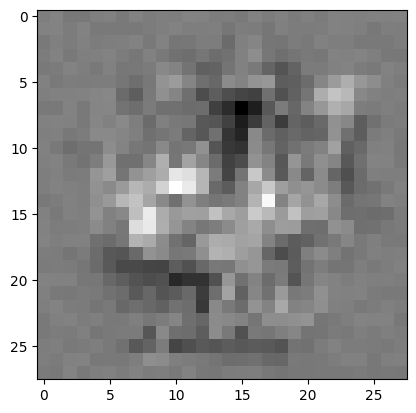

epoch 47/100, Loss: 0.039627, accuracy: 1.0


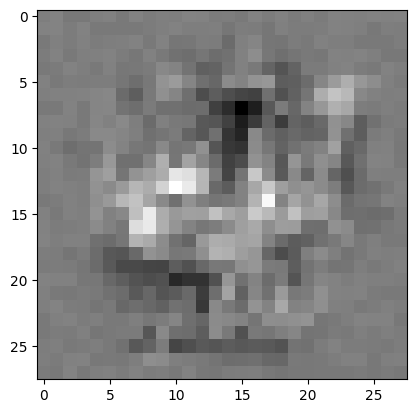

epoch 48/100, Loss: 0.039592, accuracy: 1.0


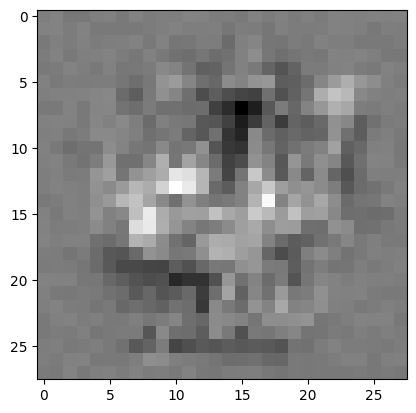

epoch 49/100, Loss: 0.039558, accuracy: 1.0


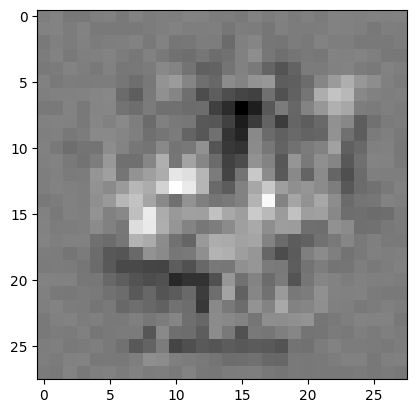

epoch 50/100, Loss: 0.039524, accuracy: 1.0


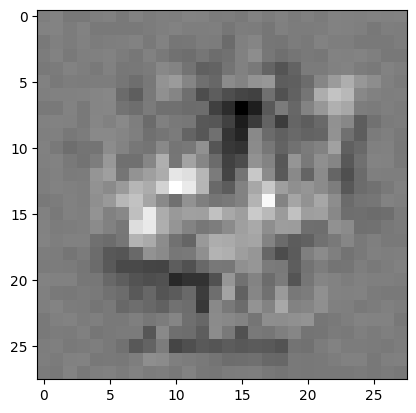

epoch 51/100, Loss: 0.039490, accuracy: 1.0


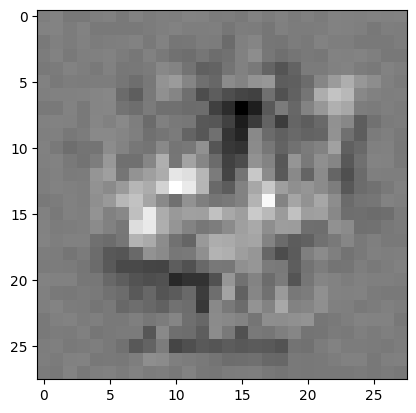

epoch 52/100, Loss: 0.039455, accuracy: 1.0


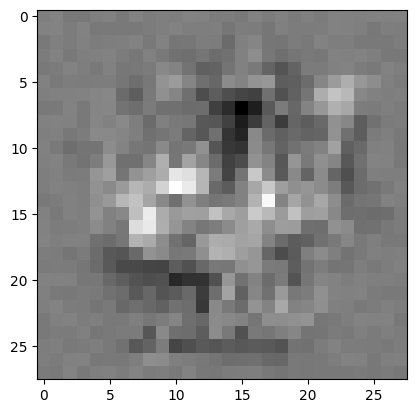

epoch 53/100, Loss: 0.039421, accuracy: 1.0


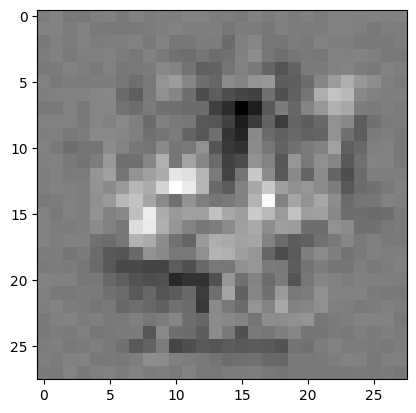

epoch 54/100, Loss: 0.039387, accuracy: 1.0


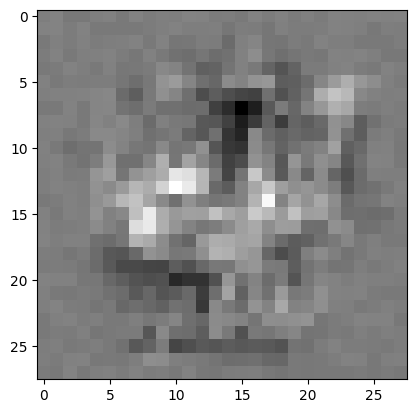

epoch 55/100, Loss: 0.039353, accuracy: 1.0


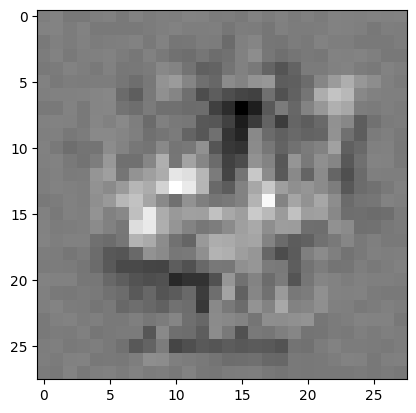

epoch 56/100, Loss: 0.039319, accuracy: 1.0


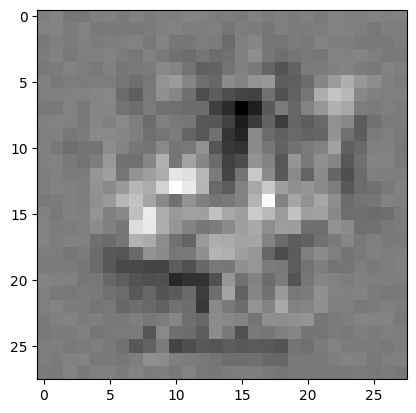

epoch 57/100, Loss: 0.039285, accuracy: 1.0


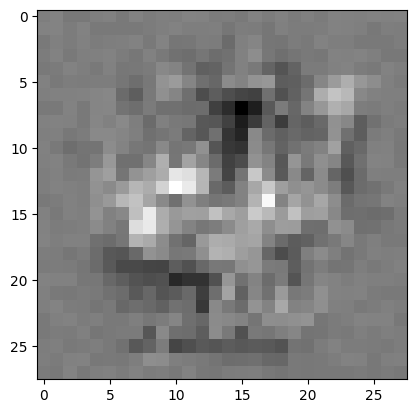

epoch 58/100, Loss: 0.039252, accuracy: 1.0


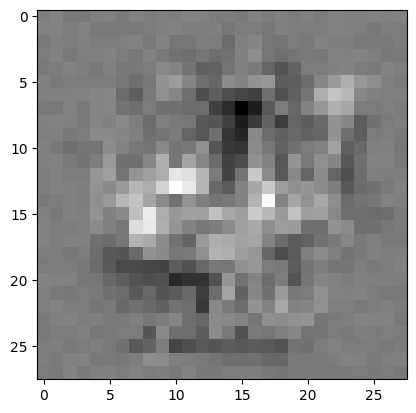

epoch 59/100, Loss: 0.039218, accuracy: 1.0


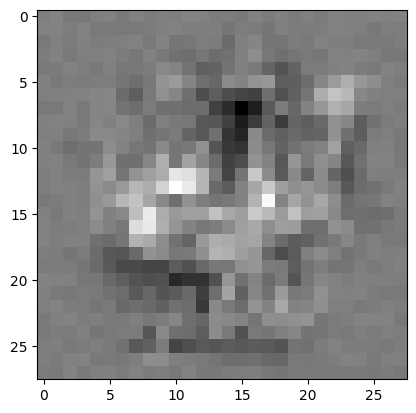

epoch 60/100, Loss: 0.039184, accuracy: 1.0


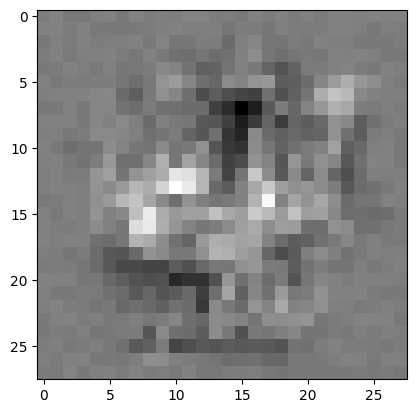

epoch 61/100, Loss: 0.039150, accuracy: 1.0


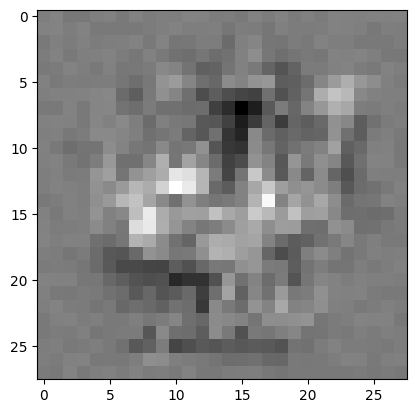

epoch 62/100, Loss: 0.039117, accuracy: 1.0


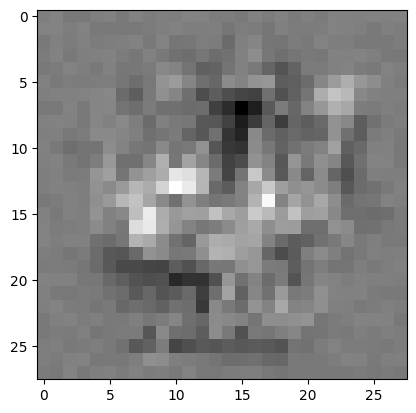

epoch 63/100, Loss: 0.039083, accuracy: 1.0


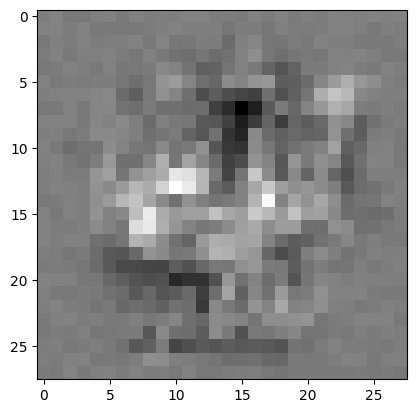

epoch 64/100, Loss: 0.039050, accuracy: 1.0


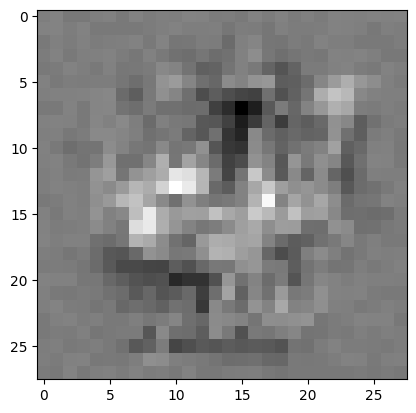

epoch 65/100, Loss: 0.039016, accuracy: 1.0


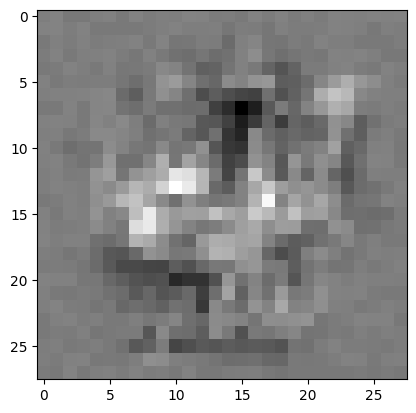

epoch 66/100, Loss: 0.038983, accuracy: 1.0


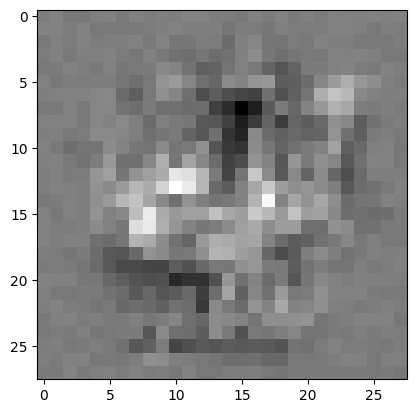

epoch 67/100, Loss: 0.038950, accuracy: 1.0


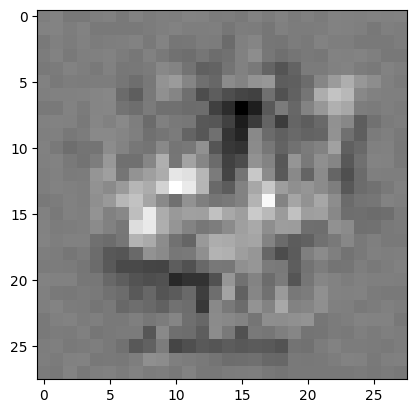

epoch 68/100, Loss: 0.038916, accuracy: 1.0


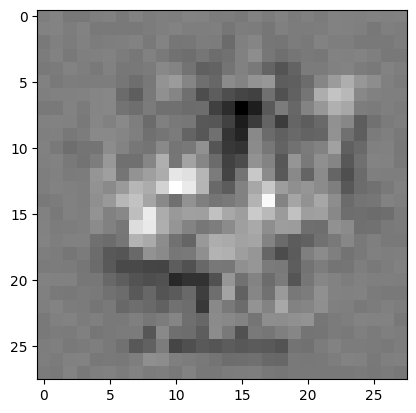

epoch 69/100, Loss: 0.038883, accuracy: 1.0


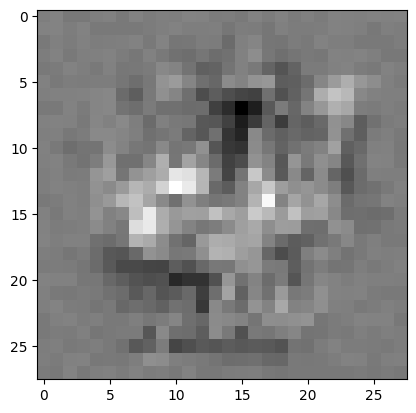

epoch 70/100, Loss: 0.038850, accuracy: 1.0


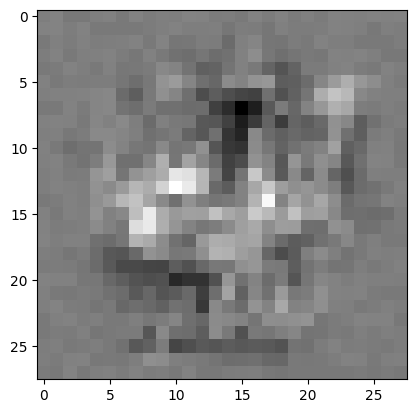

epoch 71/100, Loss: 0.038817, accuracy: 1.0


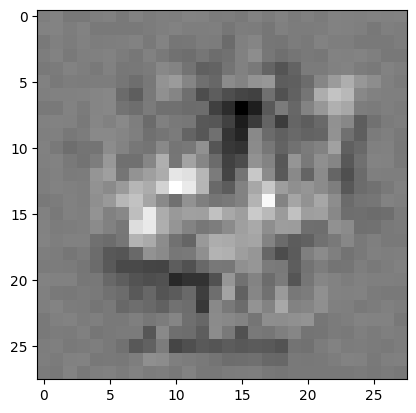

epoch 72/100, Loss: 0.038784, accuracy: 1.0


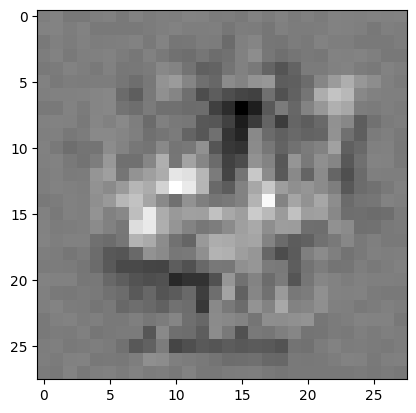

epoch 73/100, Loss: 0.038751, accuracy: 1.0


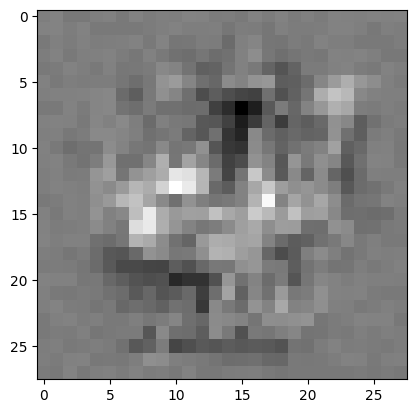

epoch 74/100, Loss: 0.038718, accuracy: 1.0


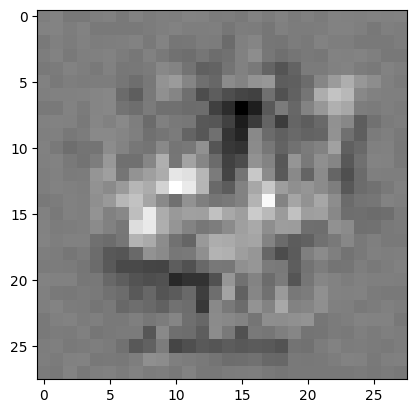

epoch 75/100, Loss: 0.038685, accuracy: 1.0


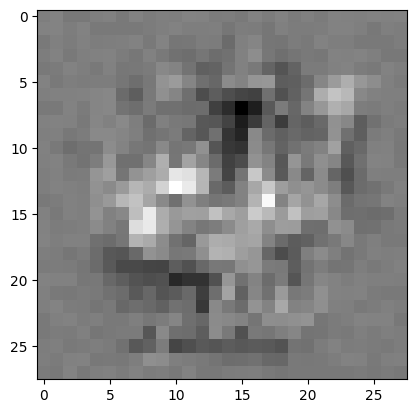

epoch 76/100, Loss: 0.038652, accuracy: 1.0


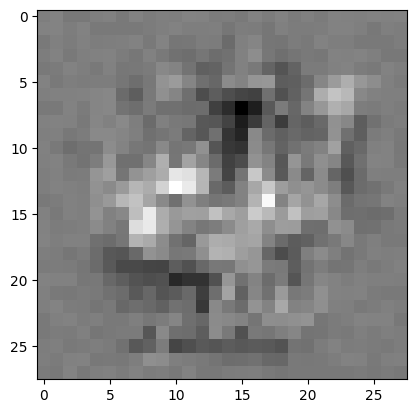

epoch 77/100, Loss: 0.038619, accuracy: 1.0


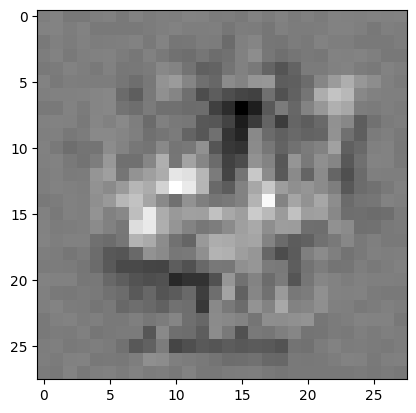

epoch 78/100, Loss: 0.038587, accuracy: 1.0


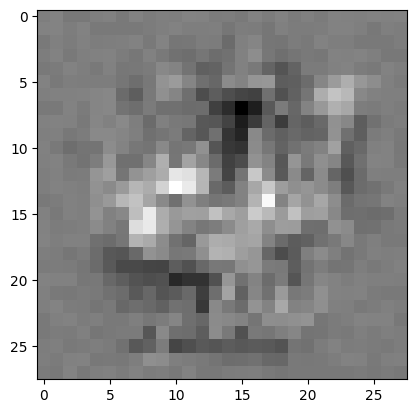

epoch 79/100, Loss: 0.038554, accuracy: 1.0


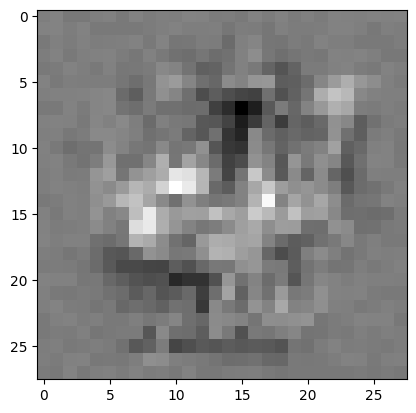

epoch 80/100, Loss: 0.038521, accuracy: 1.0


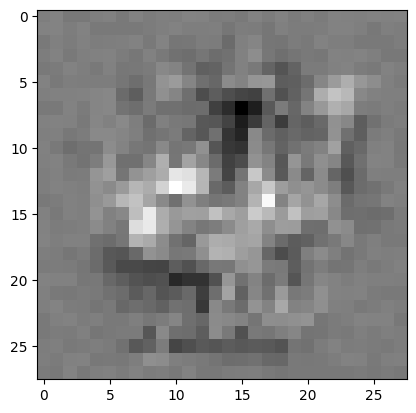

epoch 81/100, Loss: 0.038489, accuracy: 1.0


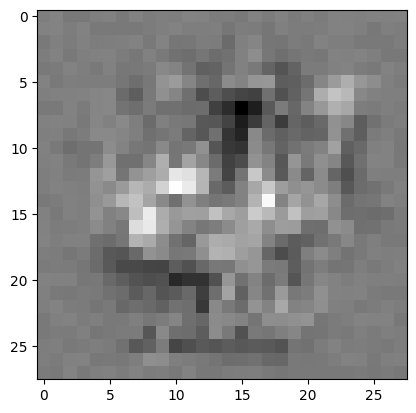

epoch 82/100, Loss: 0.038456, accuracy: 1.0


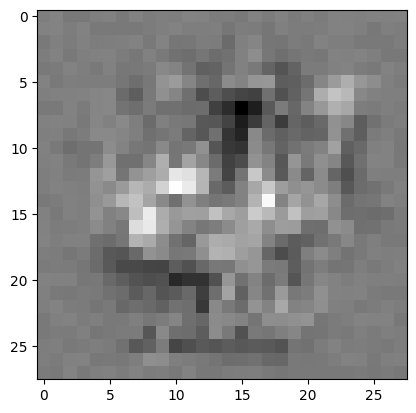

epoch 83/100, Loss: 0.038424, accuracy: 1.0


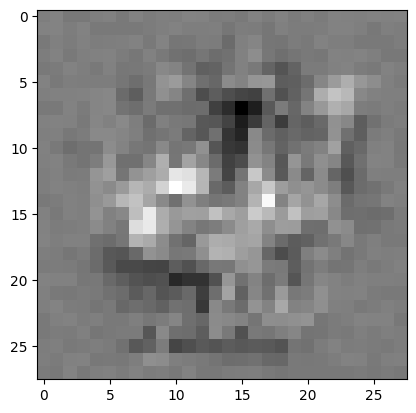

epoch 84/100, Loss: 0.038391, accuracy: 1.0


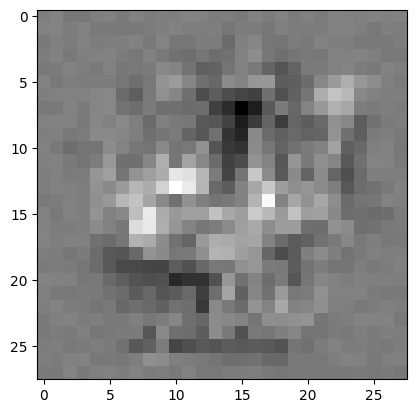

epoch 85/100, Loss: 0.038359, accuracy: 1.0


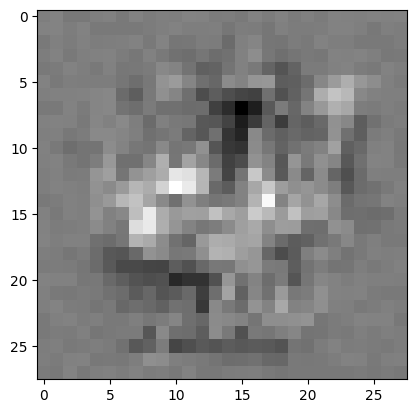

epoch 86/100, Loss: 0.038327, accuracy: 1.0


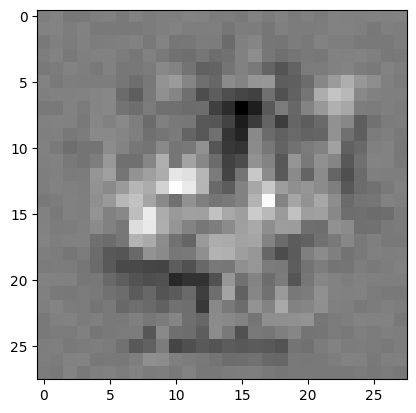

epoch 87/100, Loss: 0.038294, accuracy: 1.0


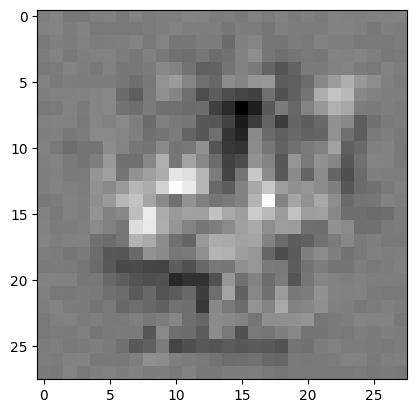

epoch 88/100, Loss: 0.038262, accuracy: 1.0


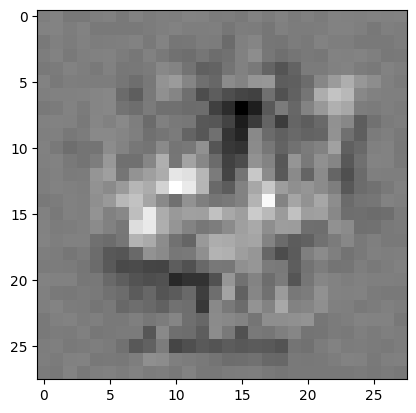

epoch 89/100, Loss: 0.038230, accuracy: 1.0


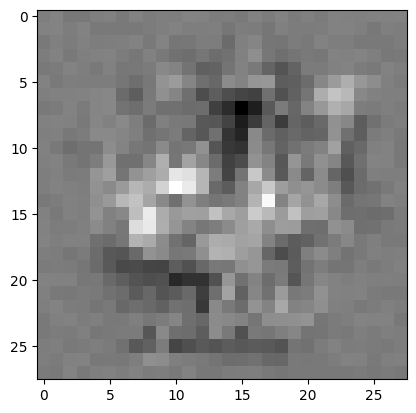

epoch 90/100, Loss: 0.038198, accuracy: 1.0


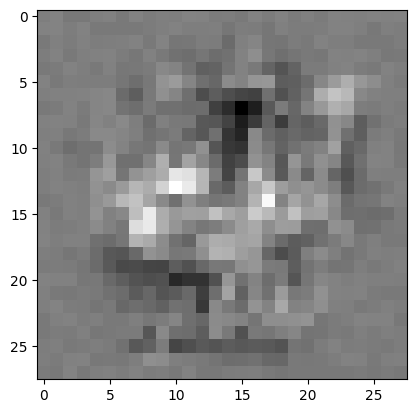

epoch 91/100, Loss: 0.038166, accuracy: 1.0


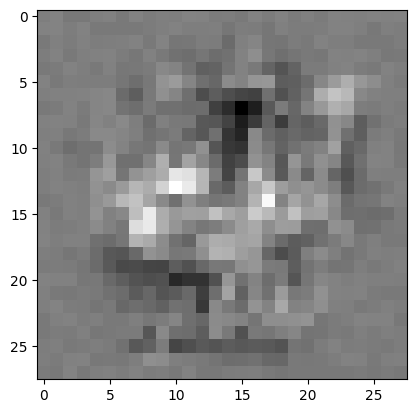

epoch 92/100, Loss: 0.038134, accuracy: 1.0


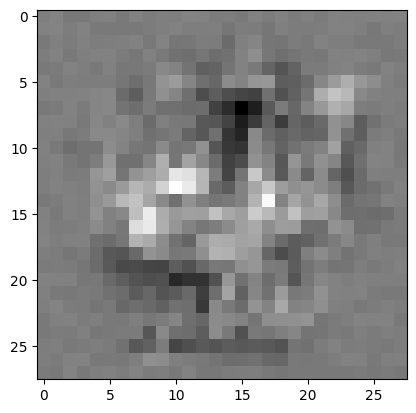

epoch 93/100, Loss: 0.038102, accuracy: 1.0


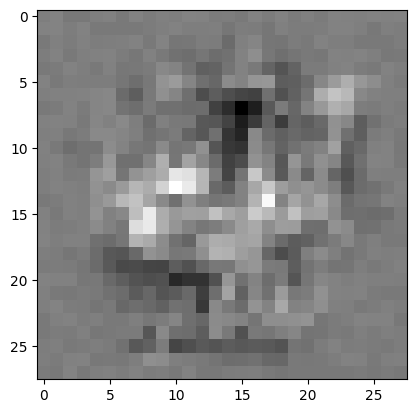

epoch 94/100, Loss: 0.038070, accuracy: 1.0


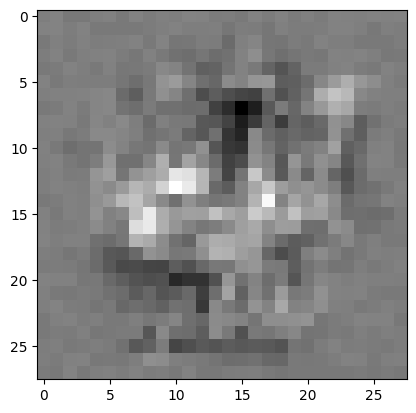

epoch 95/100, Loss: 0.038038, accuracy: 1.0


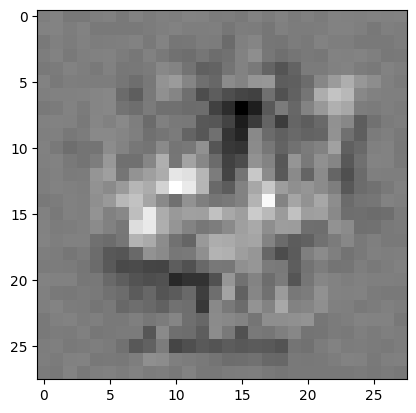

epoch 96/100, Loss: 0.038007, accuracy: 1.0


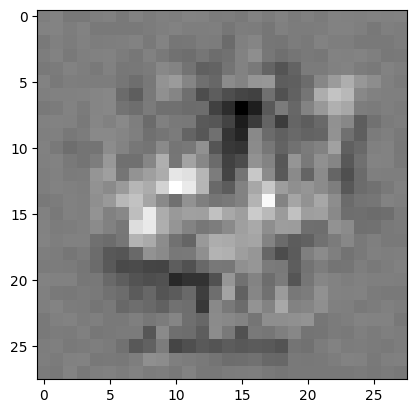

epoch 97/100, Loss: 0.037975, accuracy: 1.0


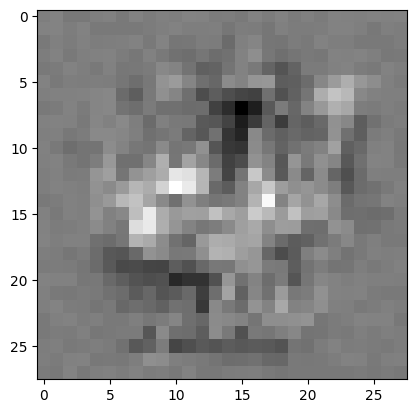

epoch 98/100, Loss: 0.037943, accuracy: 1.0


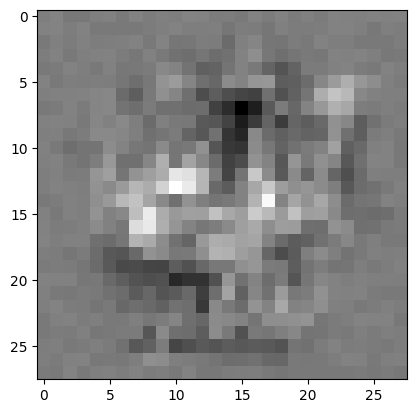

epoch 99/100, Loss: 0.037912, accuracy: 1.0


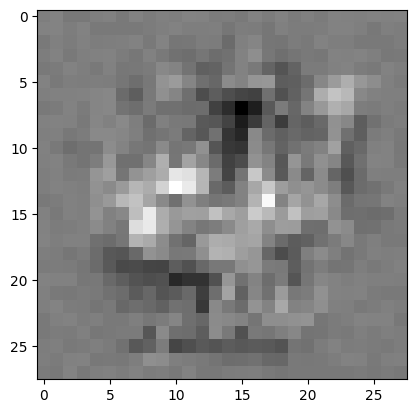

epoch 100/100, Loss: 0.037880, accuracy: 1.0


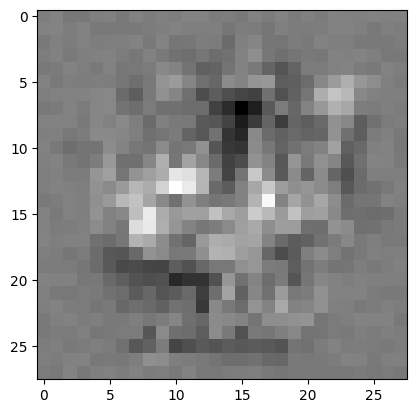

In [74]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # imprimir o numero da época, o loss e accuracy

    print(f'epoch {i+1}/{epochs}, Loss: {loss.item():.6f}, accuracy: {accuracy}')

    weights = model.state_dict()['weight']
    # print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    # print('bias:   ', bias.shape)

    # Visualizando pesos da classe 4
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? R.: (1000, 28, 28)

2. Qual é o shape da saída da rede? R.: (1000, 10)

3. Qual é o número total de parâmetros da rede, incluindo o bias? R.: (28 * 28 * 10 + 10) = 7850

# Aprendizados
